# The goal
- Compare logistic regression, NN, XGB perfromance on binary classification
- Compare different methods of dealing with imbalanced datasets

## step 1: explore data
- Note: This <a href='https://www.kaggle.com/code/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets/data'>data set from kaggle</a> contains features that went through a PCA transformation

In [1]:
from config import *

Using TensorFlow backend.


In [2]:
df = pd.read_csv('./creditcard.csv')
display(df)
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df.isna().sum().sum()

0

No null values observed

In [7]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

We are dealing with an imbalanced dataset.

In [8]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Only named columns are 'Time' and 'Amount'. Let's dive deeper into the two columns.

/Users/solinakim/opt/anaconda3/envs/mypython3.6/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/solinakim/opt/anaconda3/envs/mypython3.6/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/solinakim/opt/anaconda3/envs/mypython3.6/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to

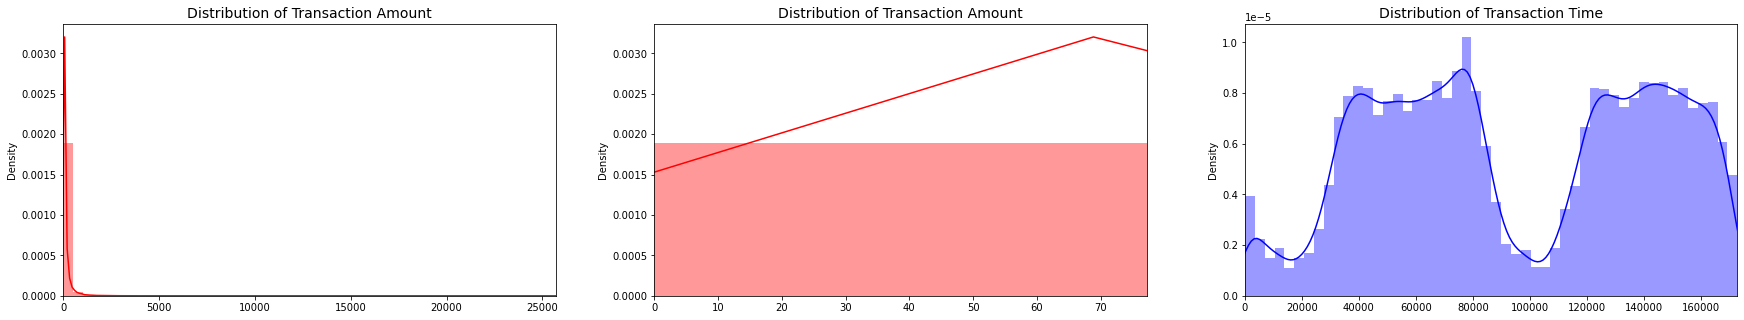

In [9]:
fig, ax = plt.subplots(1, 3, figsize=(30,5))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(amount_val, ax=ax[1], color='r')
ax[1].set_title('Distribution of Transaction Amount', fontsize=14)
ax[1].set_xlim([min(amount_val), np.percentile(amount_val, 75)])

sns.distplot(time_val, ax=ax[2], color='b')
ax[2].set_title('Distribution of Transaction Time', fontsize=14)
ax[2].set_xlim([min(time_val), max(time_val)])


plt.show()


- Data on transaction time seems varied.
- Data on transaction amount seems focused in the 0-70 range, with outliers.

In [10]:
print(f'75th percentile of transaction amount is {round(np.percentile(amount_val, 75))}')
print(f'average of transaction amount is {round(np.mean(amount_val))}')
print(f'max value of transaction amount is {max(amount_val)}')


75th percentile of transaction amount is 77
average of transaction amount is 88
max value of transaction amount is 25691.16


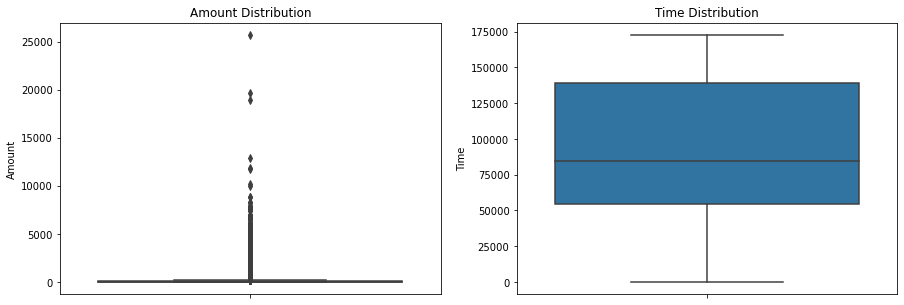

In [11]:
f, axes = plt.subplots(ncols=2, figsize=(15,5))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(y="Amount", data=df, ax=axes[0])
axes[0].set_title('Amount Distribution')

sns.boxplot(y="Time", data=df, ax=axes[1])
axes[1].set_title('Time Distribution')

plt.show()

Box plots confirm 'Amount' column's multiple outliers.<br>
Before exploring various ways to deal with these outliers, let's set up baseline performance for logistic regression, neural networks, and xgb.

## Step 2: Train baseline logistic regression model

In [3]:
X = df.drop('Class', axis=1).values
Y = df.Class.values

#test
X.shape[0] == Y.shape[0]

True

In [4]:
seed = 1234
tf.random.set_seed(seed)

x, x_test, y, y_test = train_test_split(X, Y, test_size=0.15, shuffle=True, random_state=seed)
x_train, x_cv, y_train, y_cv = train_test_split(x, y, test_size=0.15, shuffle=True, random_state=seed)

print(f'original dataset: {x.shape[0]} examples, {x.shape[1]} features')
print(f'training set: {x_train.shape[0]} examples, {round(100 * x_train.shape[0] / X.shape[0])}%')
print(f'validation set: {x_cv.shape[0]} examples, {round(100 * x_cv.shape[0] / X.shape[0])}%')
print(f'test set: {x_test.shape[0]} examples, {round(100 * x_test.shape[0] / X.shape[0])}%')
print('======================================')
print(f'positive examples split:')
print(f'training set: {round(len(y_train[y_train==1]) / len(Y[Y==1]) * 100)}%')
print(f'cv set: {round(len(y_test[y_test==1]) / len(Y[Y==1]) * 100)}%')
print(f'test set: {round(len(y_cv[y_cv==1]) / len(Y[Y==1]) * 100)}%')
print('======================================')
print(f'positive example percentage within sets:')
print(f'training set: {round(len(y_train[y_train==1]) / len(y_train) * 100, 3)}% positive examples')
print(f'cv set: {round(len(y_cv[y_cv==1]) / len(y_cv) * 100, 3)}% positive examples')
print(f'test set: {round(len(y_test[y_test==1]) / len(y_test) * 100, 3)}% positive examples')


original dataset: 242085 examples, 30 features
training set: 205772 examples, 72%
validation set: 36313 examples, 13%
test set: 42722 examples, 15%
positive examples split:
training set: 74%
cv set: 16%
test set: 10%
positive example percentage within sets:
training set: 0.176% positive examples
cv set: 0.132% positive examples
test set: 0.19% positive examples


In [13]:
# building moddel framework
lgmodel_v1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid')
])

lgmodel_v1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)


In [14]:
NOW = datetime.datetime.now().strftime("%Y%m%d%H%M%S")
NAME = f"creditcard_fraud_lgmodel_{NOW}"
tensorboard = TensorBoard(log_dir=f'./logs/{NAME}', histogram_freq=1)

logging.getLogger("tensorflow").setLevel(logging.ERROR)

lgmodel_v1.fit(
    x_train, y_train,
    epochs=50,
    callbacks = [tensorboard],
    validation_data = (x_cv, y_cv),
)


Train on 205772 samples, validate on 36313 samples
Epoch 1/50
205772/205772 [==============================] - 12s 58us/sample - loss: 12.5313 - binary_accuracy: 0.9960 - precision_1: 0.0771 - recall_1: 0.1129 - val_loss: 20.1012 - val_binary_accuracy: 0.9985 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 2/50
205772/205772 [==============================] - 11s 52us/sample - loss: 10.1412 - binary_accuracy: 0.9961 - precision_1: 0.1220 - recall_1: 0.1956 - val_loss: 7.4008 - val_binary_accuracy: 0.9983 - val_precision_1: 0.2692 - val_recall_1: 0.145820 - recall_1: 0.19
Epoch 3/50
205772/205772 [==============================] - 10s 47us/sample - loss: 8.3838 - binary_accuracy: 0.9963 - precision_1: 0.1888 - recall_1: 0.3251 - val_loss: 1.4277 - val_binary_accuracy: 0.9981 - val_precision_1: 0.3333 - val_recall_1: 0.4167
Epoch 4/50
205772/205772 [==============================] - 9s 46us/sample - loss: 8.5196 - binary_accuracy: 0.9964 - precision_1: 0.1965 - recall_1: 0

In [23]:
sys.stdout = open(f'./logs/{NAME}/config.txt', 'w')
print(lgmodel_v1.summary())
print(lgmodel_v1.to_json())

In [24]:
%load_ext tensorboard
%tensorboard --logdir logs/{NAME}

### Results
- Displaying high accuracy on CV, but low precision & recall
- Does not seem to be overfitting, since both CV and training set are performing similarly
- Performance seems to plateau after 30 epochs

- thoughts: low precision & recall seems likely due to imbalanced dataset.


## Step 3: Train baseline neural network
- 3 Dense hidden layers of 25, 15, and 5 units
- no regularization

In [5]:
# building model framework
nnmodel_v1 = tf.keras.models.Sequential([
        Dense(units=x_train.shape[1], activation='relu'),
        Dense(units=15, activation='relu'),
        Dense(units=5, activation='relu'),
        Dense(units=1, activation='sigmoid'),
])

nnmodel_v1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)


In [6]:
NOW = datetime.datetime.now().strftime("%Y%m%d%H%M%S")
NAME = f"creditcard_fraud_nnmodel_{NOW}"
tensorboard = TensorBoard(log_dir=f'./logs/{NAME}', histogram_freq=1)

In [7]:

logging.getLogger("tensorflow").setLevel(logging.ERROR)

nnmodel_v1.fit(
    x_train, y_train,
    epochs=50,
    callbacks = [tensorboard],
    validation_data = (x_cv, y_cv),
)

Train on 205772 samples, validate on 36313 samples
Epoch 1/50
205772/205772 [==============================] - 15s 72us/sample - loss: 0.9194 - binary_accuracy: 0.9978 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.0102 - val_binary_accuracy: 0.9987 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/50
205772/205772 [==============================] - 13s 64us/sample - loss: 0.0130 - binary_accuracy: 0.9982 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.0101 - val_binary_accuracy: 0.9987 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/50
205772/205772 [==============================] - 12s 59us/sample - loss: 0.0130 - binary_accuracy: 0.9982 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.0101 - val_binary_accuracy: 0.9987 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 0.0000e+00 - recall: 0.00
Epoch 4/50
205772/205772 [==============================] - 13s 62us/sample - loss: 0.0130 - binary_accuracy: 0.9982 - precision: 0

In [25]:
sys.stdout = open(f'./logs/{NAME}/config.txt', 'w')
print(nnmodel_v1.summary())
print(nnmodel_v1.to_json())

In [26]:
%load_ext tensorboard
%tensorboard --logdir logs/{NAME}

Reusing TensorBoard on port 6011 (pid 23362), started 0:01:19 ago. (Use '!kill 23362' to kill it.)

In [27]:
cv_preds = nnmodel_v1.predict(x_cv)
cv_acc = (cv_preds == y_cv).sum().astype(float) / len(cv_preds) * 100

display(f'CV set accuracy is {cv_acc}%')


'CV set accuracy is 0.0%'

### Results 
- High accuracy, but low precision and recall
- Model is working to effectively minimize loss
- Again, results show a need to deal with dataset imbalance.

## Step 4: Train baseline xgb


In [28]:
xgbmodel_v1 = XGBClassifier(n_estimators=100)
xgbmodel_v1.fit(x_train, y_train)

/Users/solinakim/opt/anaconda3/envs/mypython3.6/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [29]:
train_preds = xgbmodel_v1.predict(x_train)
train_acc = (train_preds == y_train).sum().astype(float) / len(train_preds) * 100

cv_preds = xgbmodel_v1.predict(x_cv)
cv_acc = (cv_preds == y_cv).sum().astype(float) / len(cv_preds) * 100

display(f'CV set accuracy is {cv_acc}%')



'training set accuracy is 100.0%'

'CV set accuracy is 99.96970781813675%'

### Results
- Again, need to solve imbalanced dataset

# Step 5: Compare Results

In [15]:
# predictions
lgmodel_v1_cv_preds = lgmodel_v1.predict(x_cv)
nnmodel_v1_cv_preds = nnmodel_v1.predict(x_cv)
xgbmodel_v1_cv_preds = xgbmodel_v1.predict(x_cv)

# converting probabilities from sigmoid to binary classes
binclass_threshold = 0.5
lgmodel_v1_cv_preds = (lgmodel_v1_cv_preds >= binclass_threshold).astype(int)
nnmodel_v1_cv_preds = (nnmodel_v1_cv_preds >= binclass_threshold).astype(int)

# generating confusion matrices
cm_lgmodel_v1 = confusion_matrix(y_cv, lgmodel_v1_cv_preds)
cm_nnmodel_v1 = confusion_matrix(y_cv, nnmodel_v1_cv_preds)
cm_xgbmodel_v1 = confusion_matrix(y_cv, xgbmodel_v1_cv_preds)

'========F1 SCORES========'

'logistic regression: 0.5599999999999999'

'neural networks: 0.0'

'xgboost: 0.8842105263157894'

'========RECEIVER OPERATING CHARACTERISTIC CURVE (ROC AUC)========'

'logistic regression: 0.7913357691070362'

'neural networks: 0.5'

'xgboost 0.9374310630084104'

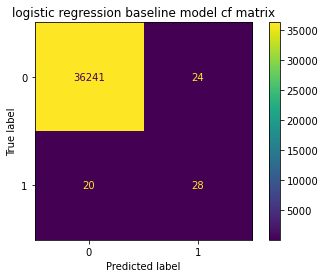

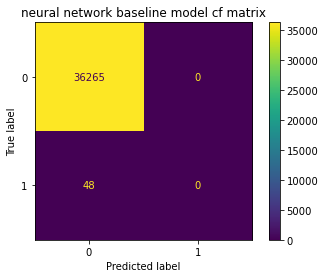

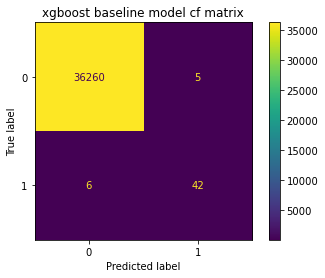

In [16]:
dp1 = ConfusionMatrixDisplay(confusion_matrix=cm_lgmodel_v1)
dp1.plot()
dp1.ax_.set_title('logistic regression baseline model cf matrix')

dp2 = ConfusionMatrixDisplay(confusion_matrix=cm_nnmodel_v1)
dp2.plot()
dp2.ax_.set_title('neural network baseline model cf matrix')

dp3 = ConfusionMatrixDisplay(confusion_matrix=cm_xgbmodel_v1)
dp3.plot()
dp3.ax_.set_title('xgboost baseline model cf matrix')

# roc-auc scores
from sklearn.metrics import roc_auc_score, f1_score

display('========F1 SCORES========')
display(f'logistic regression: {f1_score(y_cv, lgmodel_v1_cv_preds)}')
display(f'neural networks: {f1_score(y_cv, nnmodel_v1_cv_preds)}')
display(f'xgboost: {f1_score(y_cv, xgbmodel_v1_cv_preds)}')

display('========RECEIVER OPERATING CHARACTERISTIC CURVE (ROC AUC)========')
display(f'logistic regression: {roc_auc_score(y_cv, lgmodel_v1_cv_preds)}')
display(f'neural networks: {roc_auc_score(y_cv, nnmodel_v1_cv_preds)}')
display(f'xgboost {roc_auc_score(y_cv, xgbmodel_v1_cv_preds)}')

In [110]:
lgmodel_v1.save('./models/lgmodel_v1')
nnmodel_v1.save('./models/nnmodel_v1')
xgbmodel_v1.save_model('./models/xgbmodel_v1.json')

In [10]:
# continuing session by reloading same models as above

lgmodel_v1 = tf.keras.models.load_model('./models/lgmodel_v1')
nnmodel_v1 = tf.keras.models.load_model('./models/nnmodel_v1')
xgbmodel_v1 = XGBClassifier()
xgbmodel_v1.load_model('./models/xgbmodel_v1.json')

# Conclusion
- All three models display high accuracy, but because of the imbalance of positive examples in the dataset, the AUC score is a better metric.
- Based on the AUC score, the xgboost model seems to be performing best (0.937), followed by the logistic regression model (0.739)
- However, low F1 scores for logistic regression (0.517) indicate that even this AUC score is overly optimistic, and the only model performing relatively well is the xgboost model.

# Next steps:
- Try to improve model performance by fixing imbalance in the dataset with undersampling & oversampling methods.